# 4.7 Exercises
For help with exercises, please visit the [site](http://www.wiley.com/college/goodrich).
### Reinforcement

__R-4.1__ Describe a recursive algorithm for finding the maximum element in a sequence, S, of n elements. What is your running time and space usage?

In [1]:
def recursive_max(arr, maximum=None):
    if len(arr) == 0:
        return maximum
    if maximum == None:
        return recursive_max(arr[1:], maximum=arr[0])
    else:
        new_max = maximum if maximum > arr[0] else arr[0]
        return recursive_max(arr[1:], maximum=new_max)
    
assert recursive_max(arr=[100,20,34,33,12,78,43,3,200]) == 200

The time complaxity is $O(n)$. Space complexity is the same as different segments of the array are not regenerated, but accessed by the function.

__R-4.2__ Draw the recursion trace for the computation of power(2, 5), using the
traditional function implemented in Code Fragment 4.11.

In [2]:
def power(n, m, trace=False):
    if m == 0:
        return 1
    if trace:
        print(f"power({n},{m-1})")
    return n * power(n, m-1, trace=trace)
power(2,5, trace=True)

power(2,4)
power(2,3)
power(2,2)
power(2,1)
power(2,0)


32

__R-4.3__ Draw the recursion trace for the computation of power(2, 18), using the repeated squaring algorithm, as implemented in Code Fragment 4.12.

In [3]:
power(2,18,trace=True)

power(2,17)
power(2,16)
power(2,15)
power(2,14)
power(2,13)
power(2,12)
power(2,11)
power(2,10)
power(2,9)
power(2,8)
power(2,7)
power(2,6)
power(2,5)
power(2,4)
power(2,3)
power(2,2)
power(2,1)
power(2,0)


262144

### Creativity

__C-4.9__ Write a short recursive Python function that finds the minimum and maximum values in a sequence without using any loops.

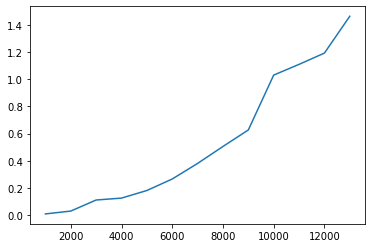

In [4]:
def recursive_min_max(arr, minimum=None, maximum=None):
    if len(arr) == 0:
        return minimum, maximum
    if maximum == None and minimum == None:
        return recursive_min_max(arr[1:], minimum=arr[0], maximum=arr[0])
    else:
        new_max = maximum if maximum > arr[0] else arr[0]
        new_min = minimum if minimum < arr[0] else arr[0]
        return recursive_min_max(arr[1:], minimum=new_min, maximum=new_max)

# Testing and Plotting
from random import randint
import sys
from time import time, sleep
import matplotlib.pyplot as plt
import numpy as np

sys.setrecursionlimit(20000)
run_times = []
loop = list(range(1000,13001, 1000))

for element in loop:
    stime = time()
    recursive_min_max(arr=[randint(1,1e20) for _ in range(int(element))])
    run_times.append(time() - stime)
    #sleep(0.5)
plt.plot(loop, run_times)

In [5]:
run_dict = {k:v for k,v in zip(loop, run_times)}
run_dict

{1000: 0.008363723754882812,
 2000: 0.029332876205444336,
 3000: 0.11074686050415039,
 4000: 0.1246800422668457,
 5000: 0.18065142631530762,
 6000: 0.2652888298034668,
 7000: 0.37985992431640625,
 8000: 0.5046918392181396,
 9000: 0.6260776519775391,
 10000: 1.029914140701294,
 11000: 1.1087429523468018,
 12000: 1.1917078495025635,
 13000: 1.4627957344055176}

__C-4.10__ Describe a recursive algorithm to compute the integer part of the base-two
logarithm of n using only addition and integer division.

In [6]:
def int_log(n):
    if n == 1:
        return 0
    return 1 + int_log(n//2)

# Testing
import math

for i in range(100,15000):
    assert int_log(i) == int(math.log2(i))

__P-4.23__ Implement a recursive function with signature ﬁnd(path, ﬁlename) that reports all entries of the ﬁle system rooted at the given path having the given ﬁle name.

In [7]:
import os

def find(path, filename):
    content = os.listdir(path)
    current = None
    for f in content:
        current = os.path.join(path, f)
        try:
            if os.path.isfile(os.path.join(path, f)) and f == filename:
                print(os.path.join(path, filename))
            elif os.path.isdir(os.path.join(path, f)):
                find(os.path.join(path, f), filename)
                if f == filename:
                    print(os.path.join(path, filename), "/", sep="")
        except PermissionError:
            print("PermissionError occurred in processing:", current)
        except Error:
            print("Error occurred in processing:", current)
            
###

find(".", "README.md")

./README.md


__P-4.27__ Python’s os module provides a function with signature walk(path) that is a generator yielding the tuple (dirpath, dirnames, ﬁlenames) for each subdirectory of the directory identiﬁed by string path, such that string dirpath is the full path to the subdirectory, dirnames is a list of the names of the subdirectories within dirpath, and ﬁlenames is a list of the names of non-directory entries of dirpath. For example, when visiting the cs016 subdirectory of the ﬁle system shown in Figure 4.6, the walk would yield ( /user/rt/courses/cs016 , \[ homeworks , programs \], \[ grades \]). Give your own implementation of such a walk function.

In [8]:
import os

def walk(path, topdown=True, onerror=None, followlinks=False):
    """
    Directory tree generator. Mimicking the os.walk() function.
    For each directory in the directory tree rooted at top (including top itself, but excluding '.' and '..'), yields a 3-tuple

    dirpath, dirnames, filenames
    """
    output = (path, [], [])  # (dirpath, dirnames, filenames)
    try:
        for f in os.listdir(path):
            if os.path.isdir(os.path.join(path, f)):
                output[1].append(f)
            else:
                output[2].append(f)
        if topdown: yield output
        for f in output[1]:
            if followlinks and os.path.islink(os.path.join(path, f)):
                yield from walk(os.path.join(path, f))
            elif not os.path.islink(os.path.join(path, f)):
                yield from walk(os.path.join(path, f))
        if not topdown: yield output
    except PermissionError as e:
        #if onerror:
        print(e)
    except Exception as e:
        #if onerror:
        print(e)

In [9]:
# Comparing to the os.walk()

for e in walk(".", topdown=True, followlinks=True):
    print(e)
print("****************************")
for e in os.walk(".", topdown=True, followlinks=True):
    print(e)

('.', ['images', '.ipynb_checkpoints'], ['ch06-hints.pdf', 'ch05-hints.pdf', 'ch15-hints.pdf', 'README.md', 'ch11-hints.pdf', 'ch09-hints.pdf', 'ch04-Recursion.ipynb', 'ch10-hints.pdf', 'ch02-hints.pdf', 'ch14-hints.pdf', 'ch03-hints.pdf', 'ch01-Python Primer.ipynb', 'ch08-hints.pdf', 'ch04-hints.pdf', 'ch05-Array-Based Sequaences.ipynb', 'ch01-hints.pdf', 'ch12-hints.pdf', 'ch07-hints.pdf', 'ch13-hints.pdf'])
('./images', [], ['DSA_Python.jpg'])
('./.ipynb_checkpoints', [], ['ch04-Recursion-checkpoint.ipynb', 'ch05-Array-Based Sequaences-checkpoint.ipynb', 'ch01-Python Primer-checkpoint.ipynb'])
****************************
('.', ['images', '.ipynb_checkpoints'], ['ch06-hints.pdf', 'ch05-hints.pdf', 'ch15-hints.pdf', 'README.md', 'ch11-hints.pdf', 'ch09-hints.pdf', 'ch04-Recursion.ipynb', 'ch10-hints.pdf', 'ch02-hints.pdf', 'ch14-hints.pdf', 'ch03-hints.pdf', 'ch01-Python Primer.ipynb', 'ch08-hints.pdf', 'ch04-hints.pdf', 'ch05-Array-Based Sequaences.ipynb', 'ch01-hints.pdf', 'ch12-hi

In [10]:
# Using the walk method

for path, _, files in walk("/home/fred/Videos/"):
    for file in files:
        if file.endswith(".mp4"):
            print(os.path.join(path, file))

/home/fred/Videos/Classical_RL.mp4


<hr>